# Neural Networks!
In this example, we are going to make a basic neural network that trains the MNIST fashion dataset.

## Setup
There are two new imports here - Tensorflow and Keras.

Tensorflow - A Python library that helps with the development of machine learning algorithms.

Keras - A high-level neural networks API for Python

In [34]:
import tensorflow as tf
from tensorflow import keras as kr
import numpy as np
import matplotlib.pyplot as plt

These are the type of clothing that our model will predict.

In [35]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## Loading the dataset
Instead of using Pandas to load a dataset and read a CSV file, Keras has a feature allowing the programmer to automatically download and use datasets. In this example, we are going to use Keras' fashion dataset (from MNIST).

In [36]:
mnist = kr.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Getting the data ready
Each node in the neural network has a bias, which must be a number from 0 to 1. Right now, each pixel has a grayscale weight from 0 to 255. We need to convert the grayscale data from (0, 255) to (0, 1). We can do this by dividing by 255.

In [37]:
train_images = train_images / 255
test_images  = test_images  / 255

## The model
Now it is time to create the neural network. We will use Keras' Sequential network. `layers.Dense()` creates the different layers of the network, defining the shape of the network. In this example, our neural network has 3 layers:

the input layer (28x28 nodes)

1 hidden layer (128 nodes)

the output layer (10 nodes)

`tf.nn.relu` and `tf.nn.softmax` are differnt activation functions.

In [38]:
model = kr.Sequential([
    kr.layers.Flatten(
        input_shape = (28, 28)
    ),
    kr.layers.Dense(128, activation=tf.nn.relu),
    kr.layers.Dense(len(labels), activation=tf.nn.softmax)
])

### More model configuration
We can configure the model a bit further by using the `compile()` method. We can set the optimizer, the loss function that we want to use, and what metrics we want to measure after the model trains.

Optimizer - . In this case, we are using the Adam optimization algorithm.

Loss function - 

In [39]:
model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

## Training the model
Now that the model has been created, we can train the neural network with our training data and training labels.

In [40]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4975 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3760 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3359 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3120 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2962 - acc: 0.8912


## Predicting
Now that the neural network has been trained, we can make some predictions about different types of clothing.

In [70]:
predictions = model.predict(test_images)

In [113]:
def plot_image(i, prediction_vectors, true_labels, images):
    prediction_vector, true_label, image = prediction_vectors[i], true_labels[i], images[i]
    
    plt.grid(False)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(image, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_vector)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel(
        '{} {:2.0f}% ({})'.format(
            labels[predicted_label],
            100 * np.max(prediction_vector),
            labels[true_label]
        )
    )

In [114]:
def plot_value_array(i, prediction_vectors, true_labels):
    prediction_vector, true_labels = prediction_vectors[i], true_labels[i]
    
    plt.grid(False)
    
    plot = plt.bar(
        range(len(labels)),
        prediction_vector,
        color = '#fa34ab'
    )
    
    plt.xlabel('Clothing type')
    plt.ylabel('Certainty')
    
    plt.xticks(
        range(len(labels)),
        labels,
        size='small',
        rotation=90
    )
    
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_vector)
    
    plot[predicted_label].set_color('red')
    plot[true_labels].set_color('blue')

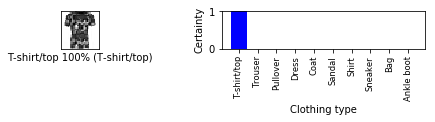

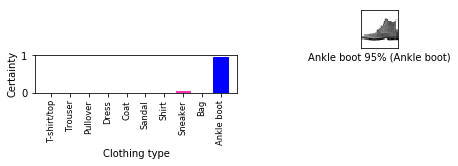

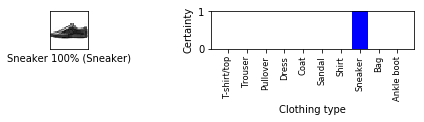

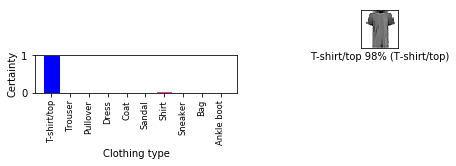

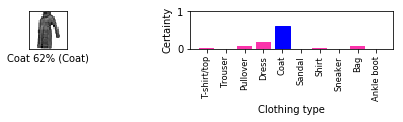

In [121]:
x = 400
y = 405
counter = 1

subplot = plt.subplot((y - x), 2, counter)
subplot.figure(figsize = (8, 4))

for i in range(x, y):
    
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot((y - x), 2, counter + 1)

    plot_value_array(i, predictions, test_labels)

    plt.show()
    
    counter += 1

## Analysis
We can analyze the accuracy of our model.

In [21]:
print("Accuracy: " + str(model.metrics[0]))

Accuracy: <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0xb50bc00f0>


In [25]:
predictions = model.predict(test_images)
print(predictions)

[[0.02219748 0.01056086 0.1391381  ... 0.01571777 0.02643525 0.00679331]
 [0.02219688 0.01056072 0.13913344 ... 0.0157161  0.02643532 0.00679287]
 [0.02219743 0.01056097 0.13913713 ... 0.01571676 0.02643504 0.00679299]
 ...
 [0.02219741 0.01056083 0.13913777 ... 0.01571727 0.02643517 0.00679306]
 [0.0221974  0.01056098 0.13913731 ... 0.01571711 0.02643493 0.00679309]
 [0.02219744 0.01056076 0.13913895 ... 0.01571791 0.02643517 0.00679327]]
